In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('genetic_test.csv')
data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        9465 non-null   object 
 1   Patient Age                                       9465 non-null   int64  
 2   Genes in mother's side                            9465 non-null   object 
 3   Inherited from father                             8914 non-null   object 
 4   Maternal gene                                     5742 non-null   object 
 5   Paternal gene                                     9465 non-null   object 
 6   Blood cell count (mcL)                            9465 non-null   float64
 7   Patient First Name                                9465 non-null   object 
 8   Family Name                                       148 non-null    object 
 9   Father's name      

# Basic EDA

In [4]:
data.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter)
count,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000
mean,7.041838,4.900207,34.575489,41.830745,-22.174326,-21.766403,-21.954675,-20.996830,-21.870998,-20.352879,-16.155621
std,4.337995,0.199159,9.834870,13.040945,41.276356,41.003356,41.130084,41.424676,41.073915,41.965045,44.328480
min,0.000000,4.120469,18.000000,20.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,3.000000,4.765843,26.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
50%,7.000000,4.898950,35.000000,42.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.359714
75%,11.000000,5.033164,43.000000,53.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,8.896115
max,14.000000,5.676184,51.000000,64.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,12.000000


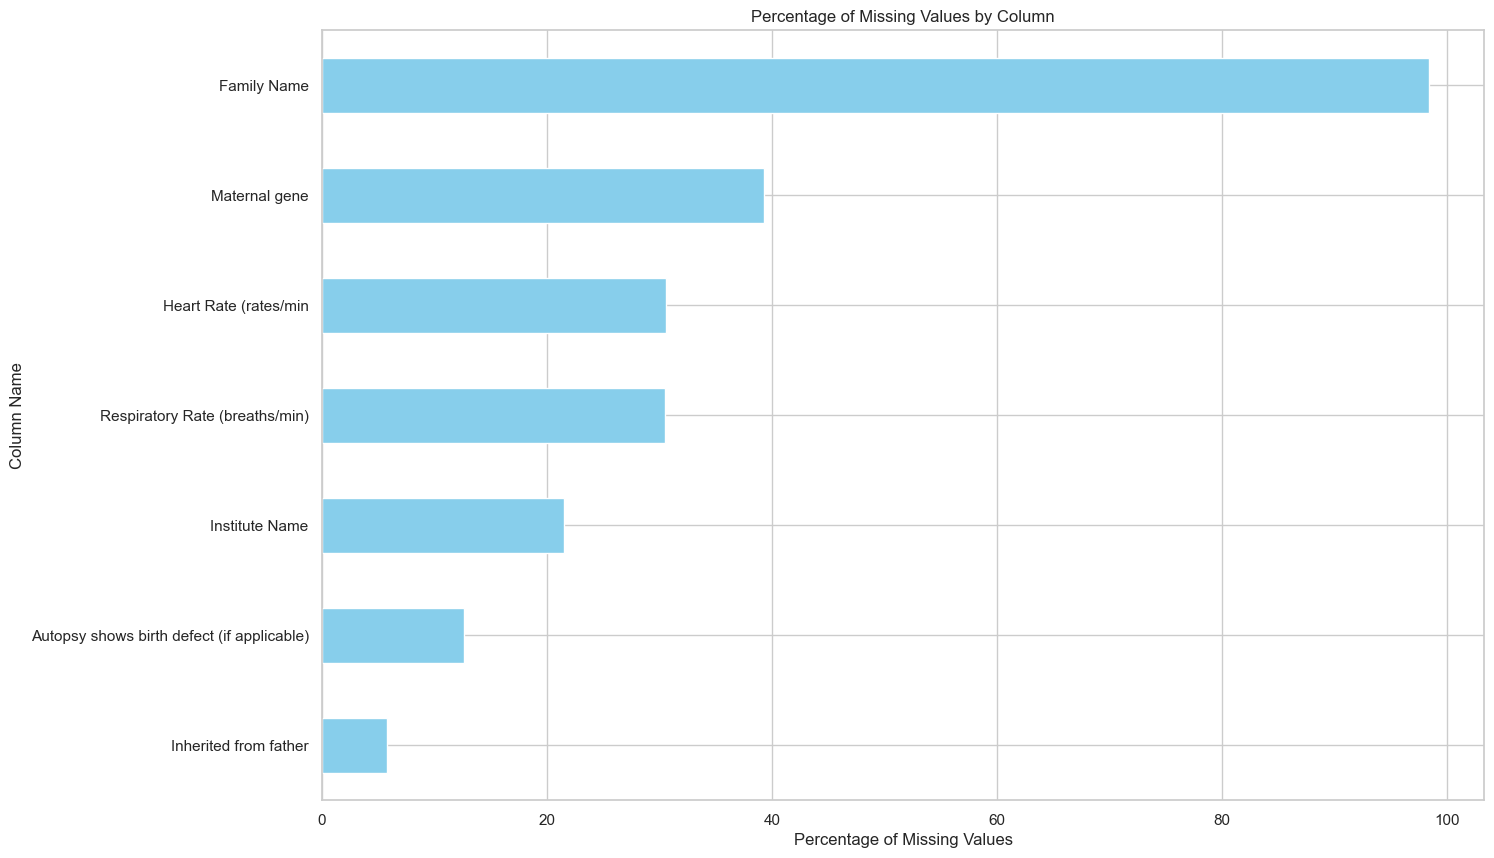

In [5]:
# Calculate missing values percentages
missing_percentage = data.isnull().sum() / len(data) * 100

# Filter columns with missing values and sort them
missing_percentage_filtered = missing_percentage[missing_percentage > 0].sort_values()

# Plotting
plt.figure(figsize=(15, 10))
missing_percentage_filtered.plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.show()


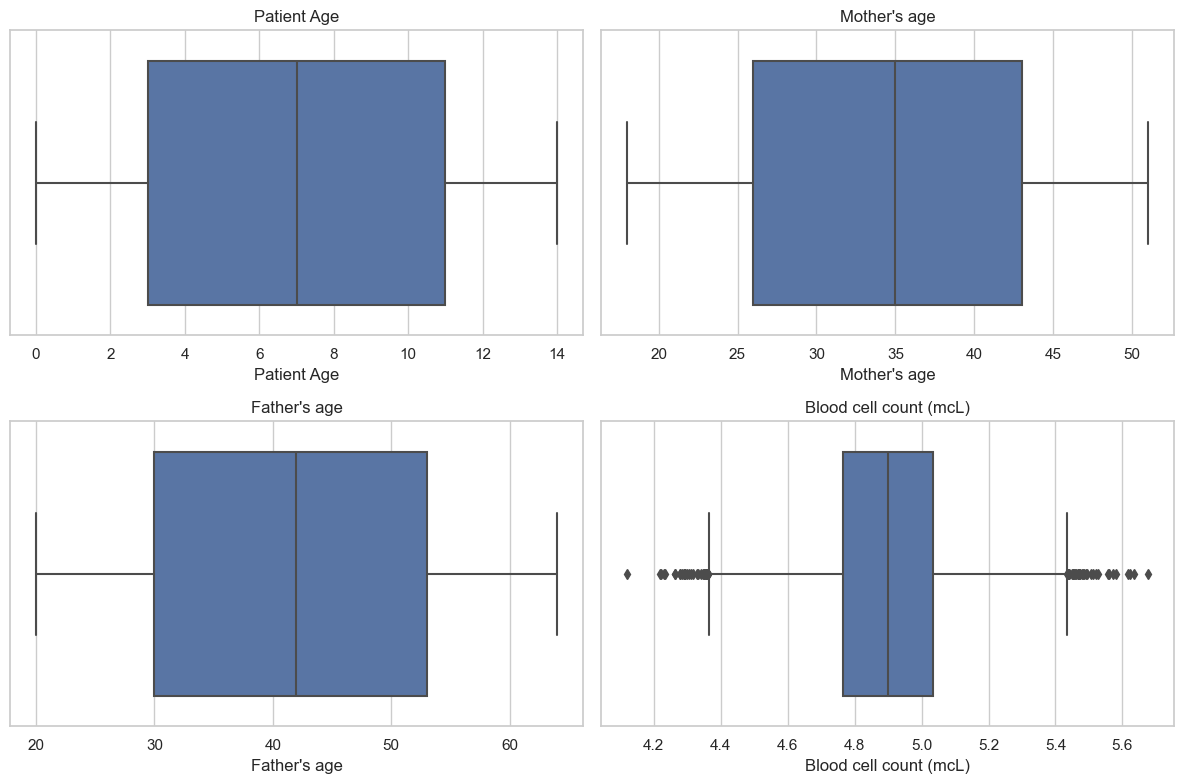

In [6]:
numerical_columns = ['Patient Age', 'Mother\'s age', 'Father\'s age', 'Blood cell count (mcL)']

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## **Not much significant Outliers**

C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


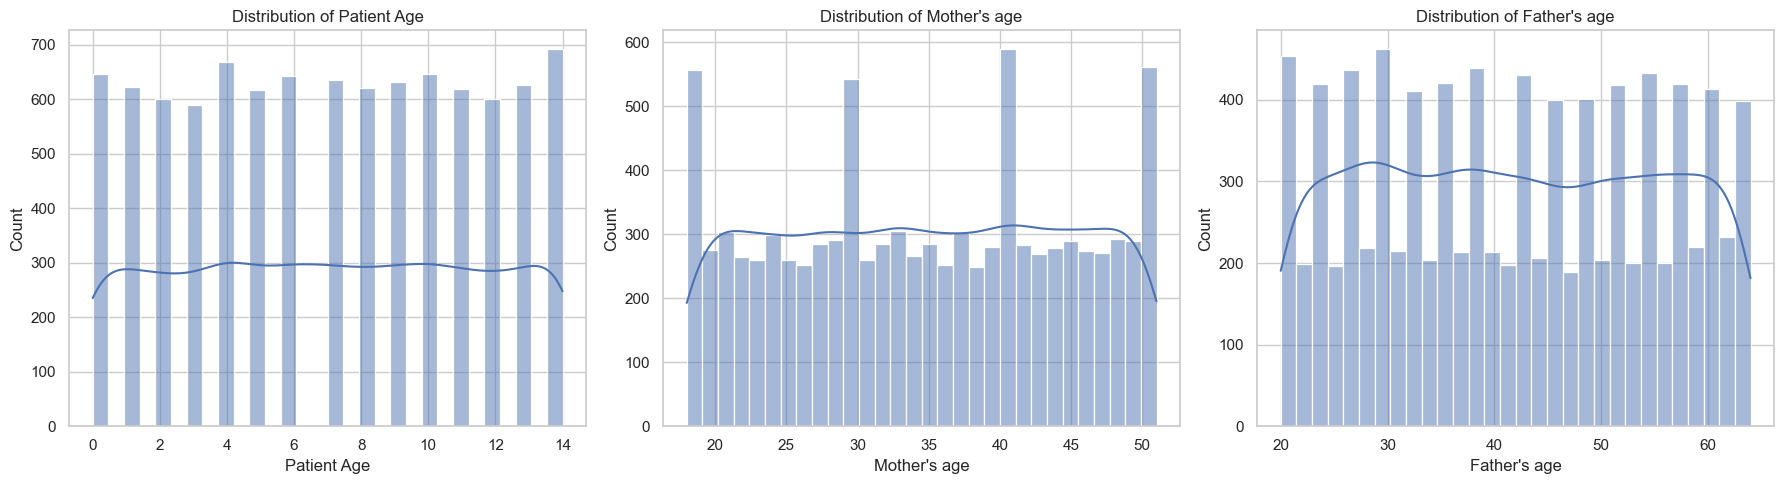

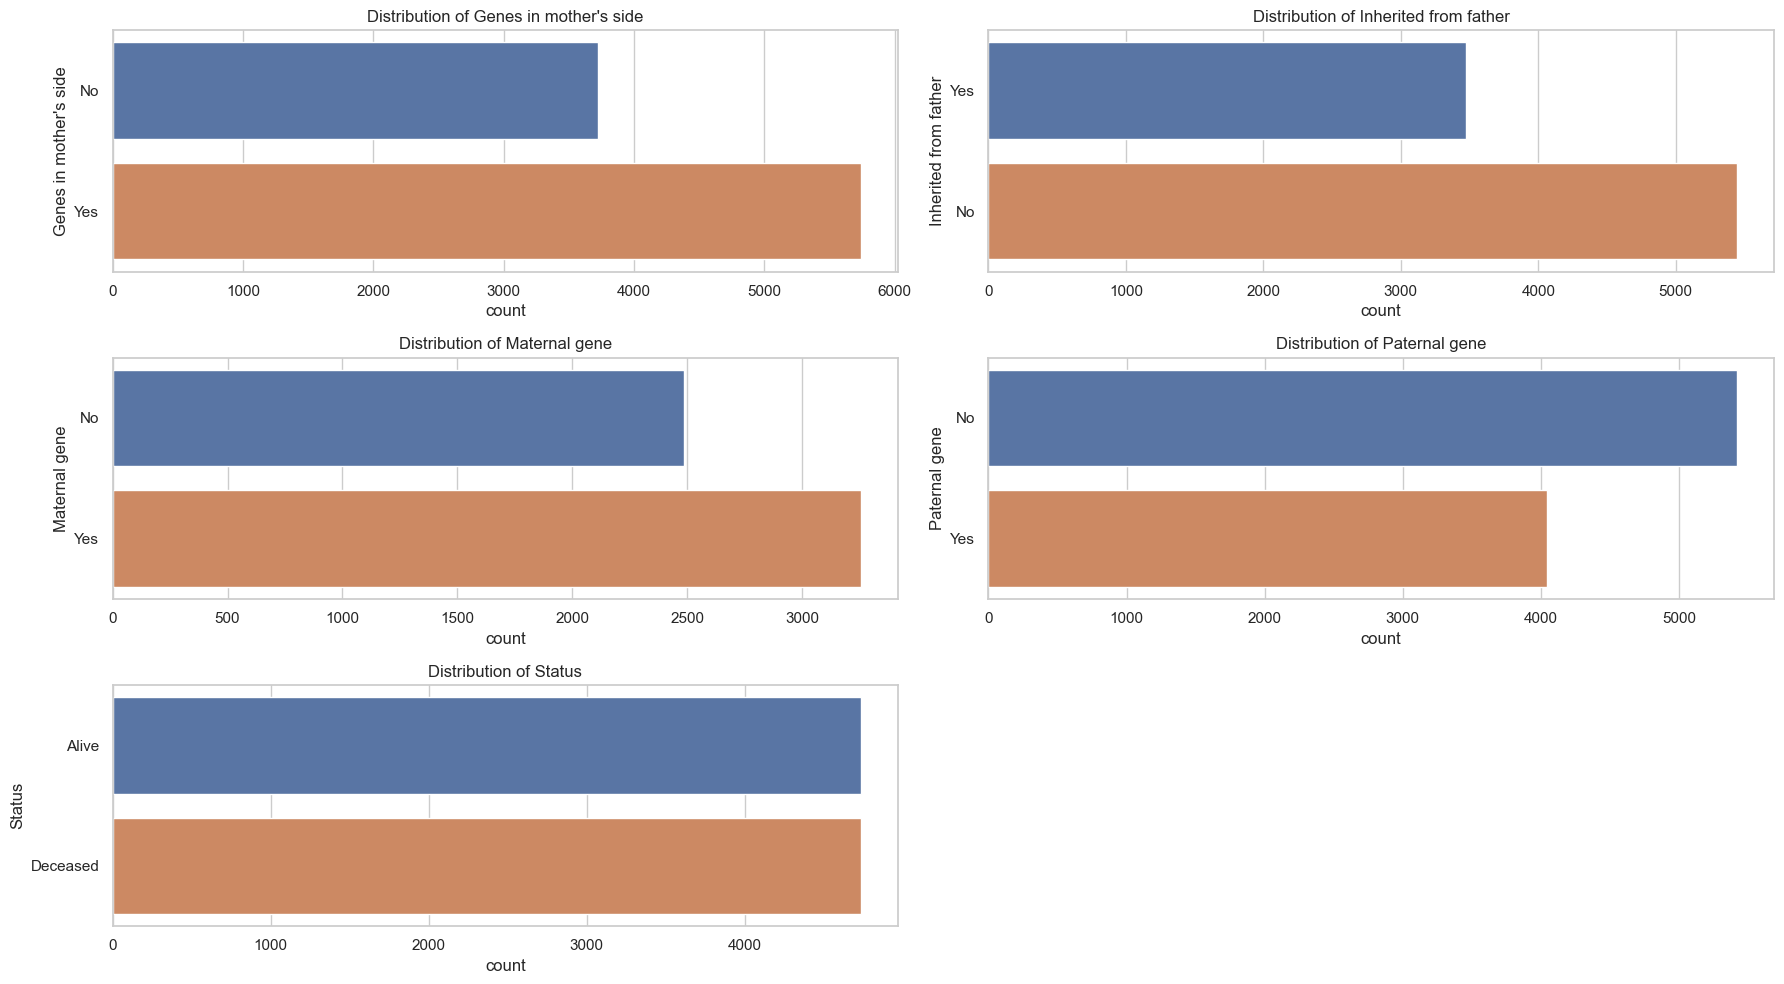

In [7]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Patient Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Patient Age')

plt.subplot(1, 3, 2)
sns.histplot(data["Mother's age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Mother's age")

plt.subplot(1, 3, 3)
sns.histplot(data["Father's age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Father's age")

plt.tight_layout()
plt.show()

categorical_variables = ['Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Status']

plt.figure(figsize=(18, 10))

for i, column in enumerate(categorical_variables, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=data[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


# Data Preprocessing

In [8]:
data.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [9]:
data["Birth asphyxia"] = data["Birth asphyxia"].replace("No record",np.NaN)
data["Birth asphyxia"] = data["Birth asphyxia"].replace("Not available",np.NaN)

data["Autopsy shows birth defect (if applicable)"] = data["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
data["Autopsy shows birth defect (if applicable)"] = data["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)
data["H/O radiation exposure (x-ray)"] = data["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
data["H/O radiation exposure (x-ray)"] = data["H/O radiation exposure (x-ray)"].replace("-",np.NaN)

data["H/O substance abuse"] = data["H/O substance abuse"].replace("Not applicable",np.NaN)
data["H/O substance abuse"] = data["H/O substance abuse"].replace("-",np.NaN)

In [10]:
data.isna().sum()

Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                           0
Father's age                                           0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                               2900
Parental consent                                       0
Follow-up                                              0
Gender                                                 0
Birth asphyxia                                      3619
Autopsy shows birth defect (if applicable)          5932
Place of birth                                         0
Folic acid details (peri-concep

In [11]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum().sum(), data.head()

(0,
    Patient Age Genes in mother's side Inherited from father Maternal gene  \
 0            6                     No                   Yes            No   
 1           10                    Yes                    No           Yes   
 2            5                     No                    No            No   
 3           13                     No                   Yes           Yes   
 4            5                     No                    No           Yes   
 
   Paternal gene  Blood cell count (mcL)  Mother's age  Father's age    Status  \
 0            No                4.981655            38            61     Alive   
 1           Yes                5.118890            33            53     Alive   
 2            No                4.876204            48            60  Deceased   
 3            No                4.687767            25            55     Alive   
 4           Yes                5.152362            41            38  Deceased   
 
   Respiratory Rate (breaths/min

In [12]:
data.isna().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Parental consent                                    0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness

In [13]:
data.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [14]:
data.rename(columns={"Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene"},inplace=True)

In [15]:
data.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age', 'Status',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Parental_Consent',
       'Follow_Up', 'Gender', 'Birth_Asphyxia', 'Autopsy_Birth_Defect',
       'Place_Birth', 'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
       'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_Test_Result'],
      dtype='object')

In [16]:
import pandas as pd

# Assuming your dataframe is named 'data'
columns_to_encode = ['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene' ,"Blood_Test_Result"]

# Applying one-hot encoding
data_encoded = pd.get_dummies(data, columns=columns_to_encode)



In [17]:
data_encoded

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,Heart_Rates_Min,Parental_Consent,Follow_Up,Gender,...,Inherited_Father_Yes,Maternal_Gene_No,Maternal_Gene_Yes,Paternal_Gene_No,Paternal_Gene_Yes,Blood_Test_Result_-99,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
0,6,4.981655,38,61,Alive,Tachypnea,Normal,-99,Low,Male,...,True,True,False,True,False,False,False,False,False,True
1,10,5.118890,33,53,Alive,Normal (30-60),-99,Yes,Low,Male,...,False,False,True,False,True,False,False,False,True,False
2,5,4.876204,48,60,Deceased,Normal (30-60),Normal,-99,Low,Ambiguous,...,False,True,False,True,False,False,False,False,False,True
3,13,4.687767,25,55,Alive,-99,-99,-99,Low,Ambiguous,...,True,False,True,True,False,False,False,False,True,False
4,5,5.152362,41,38,Deceased,Tachypnea,Tachycardia,Yes,Low,Ambiguous,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9,4.878335,28,63,Alive,-99,Tachycardia,Yes,Low,-99,...,True,False,True,True,False,False,True,False,False,False
9461,1,4.927151,37,62,Deceased,-99,-99,Yes,-99,Male,...,False,False,True,False,True,False,True,False,False,False
9462,2,4.898352,24,32,Deceased,Tachypnea,Tachycardia,Yes,-99,Female,...,True,True,False,True,False,False,False,False,True,False
9463,13,4.804840,36,56,Alive,Normal (30-60),Normal,Yes,High,-99,...,True,True,False,True,False,False,False,True,False,False


# New Features 

In [18]:

# Replacing column names in the feature creation code to match the updated names
data['Average_Parental Age'] = data[['Mother_Age', 'Father_Age']].mean(axis=1)
data['Age_Difference'] = abs(data['Mother_Age'] - data['Father_Age'])

# Updating the columns for genes inherited
data['Number_of_Genes_Inherited'] = data[['Genes_Mother_Side', 'Inherited_Father']].apply(lambda x: x == 'Yes').sum(axis=1)

# Updating the function for combined gene inheritance with the new column names
def combined_gene_inheritance(row):
    if row['Inherited_Father'] == 'Yes' and row['Maternal_Gene'] == 'Yes':
        return 'Both'
    elif row['Inherited_Father'] == 'Yes' or row['Maternal_Gene'] == 'Yes':
        return 'One'
    else:
        return 'Neither'

data['Combined_Gene_Inheritance'] = data.apply(combined_gene_inheritance, axis=1)



In [19]:
data.head()

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Average_Parental Age,Age_Difference,Number_of_Genes_Inherited,Combined_Gene_Inheritance
0,6,No,Yes,No,No,4.981655,38,61,Alive,Tachypnea,...,No,-99,2,Multiple,-99.000000,slightly abnormal,49.5,23,1,One
1,10,Yes,No,Yes,Yes,5.118890,33,53,Alive,Normal (30-60),...,No,Yes,-99,Multiple,8.179584,normal,43.0,20,1,One
2,5,No,No,No,No,4.876204,48,60,Deceased,Normal (30-60),...,Yes,No,0,Singular,-99.000000,slightly abnormal,54.0,12,0,Neither
3,13,No,Yes,Yes,No,4.687767,25,55,Alive,-99,...,-99,Yes,-99,Singular,6.884071,normal,40.0,30,1,Both
4,5,No,No,Yes,Yes,5.152362,41,38,Deceased,Tachypnea,...,No,No,-99,Multiple,6.195178,normal,39.5,3,0,One


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   9465 non-null   int64  
 1   Genes_Mother_Side             9465 non-null   object 
 2   Inherited_Father              9465 non-null   object 
 3   Maternal_Gene                 9465 non-null   object 
 4   Paternal_Gene                 9465 non-null   object 
 5   Blood_Cell_mcL                9465 non-null   float64
 6   Mother_Age                    9465 non-null   int64  
 7   Father_Age                    9465 non-null   int64  
 8   Status                        9465 non-null   object 
 9   Respiratory_Rate_Breaths_Min  9465 non-null   object 
 10  Heart_Rates_Min               9465 non-null   object 
 11  Parental_Consent              9465 non-null   object 
 12  Follow_Up                     9465 non-null   object 
 13  Gen

In [21]:
data.to_csv('preprocessed.csv')

# Feature Mapping/Encoding 

In [22]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features.head()

,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Status,Respiratory_Rate_Breaths_Min,Heart_Rates_Min,Parental_Consent,Follow_Up,Gender,...,Place_Birth,Folic_Acid,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Birth_Defects,Blood_Test_Result,Combined_Gene_Inheritance
0,No,Yes,No,No,Alive,Tachypnea,Normal,-99,Low,Male,...,Institute,Yes,No,Yes,-99,No,-99,Multiple,slightly abnormal,One
1,Yes,No,Yes,Yes,Alive,Normal (30-60),-99,Yes,Low,Male,...,-99,Yes,No,-99,-99,No,Yes,Multiple,normal,One
2,No,No,No,No,Deceased,Normal (30-60),Normal,-99,Low,Ambiguous,...,Institute,No,Yes,Yes,Yes,Yes,No,Singular,slightly abnormal,Neither
3,No,Yes,Yes,No,Alive,-99,-99,-99,Low,Ambiguous,...,-99,Yes,Yes,-99,-99,-99,Yes,Singular,normal,Both
4,No,No,Yes,Yes,Deceased,Tachypnea,Tachycardia,Yes,Low,Ambiguous,...,Home,Yes,Yes,Yes,-99,No,No,Multiple,normal,One


In [23]:
categorical_features.columns

Index(['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies', 'Birth_Defects',
       'Blood_Test_Result', 'Combined_Gene_Inheritance'],
      dtype='object')

In [24]:

columns_to_print = [
    'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
    'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
    'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
    'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
    'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
    'Assisted_Conception', 'History_Previous_Pregnancies', 'Birth_Defects',
    'Blood_Test_Result', 'Combined_Gene_Inheritance'
]

unique_values = {col: data[col].unique().tolist() for col in columns_to_print}

unique_values


{'Genes_Mother_Side': ['No', 'Yes'],
 'Inherited_Father': ['Yes', 'No'],
 'Maternal_Gene': ['No', 'Yes'],
 'Paternal_Gene': ['No', 'Yes'],
 'Status': ['Alive', 'Deceased'],
 'Respiratory_Rate_Breaths_Min': ['Tachypnea', 'Normal (30-60)', '-99'],
 'Heart_Rates_Min': ['Normal', '-99', 'Tachycardia'],
 'Parental_Consent': ['-99', 'Yes'],
 'Follow_Up': ['Low', 'High', '-99'],
 'Gender': ['Male', 'Ambiguous', '-99', 'Female'],
 'Birth_Asphyxia': ['Yes', '-99', 'No'],
 'Autopsy_Birth_Defect': ['No', '-99', 'Yes'],
 'Place_Birth': ['Institute', '-99', 'Home'],
 'Folic_Acid': ['Yes', 'No', '-99'],
 'Maternal_Illness': ['No', 'Yes', '-99'],
 'Radiation_Exposure': ['Yes', '-99', 'No'],
 'Substance_Abuse': ['-99', 'Yes', 'No'],
 'Assisted_Conception': ['No', 'Yes', '-99'],
 'History_Previous_Pregnancies': ['-99', 'Yes', 'No'],
 'Birth_Defects': ['Multiple', 'Singular', '-99'],
 'Blood_Test_Result': ['slightly abnormal',
  'normal',
  '-99',
  'inconclusive',
  'abnormal'],
 'Combined_Gene_Inherit

In [25]:
encoding_dict = {
    'Genes_Mother_Side': {'Yes': 1, 'No': 0},
    'Inherited_Father': {'No': 0, 'Yes': 1},
    'Maternal_Gene': {'Yes': 1, 'No': 0},
    'Paternal_Gene': {'No': 0, 'Yes': 1},
    'Status': {'Alive': 1, 'Deceased': 0},
    'Respiratory_Rate_Breaths_Min': {'Normal (30-60)': 1, 'Tachypnea': 0},
    'Heart_Rates_Min': {'Normal': 1, 'Tachycardia': 0},
    'Follow_Up': {'High': 1, 'Low': 0},
    'Gender': {'Ambiguous': 0, 'Male': 1, 'Female': 2},
    'Birth_Asphyxia': {'Yes': 1, 'No': 0},
    'Autopsy_Birth_Defect': {'Yes': 1, 'No': 0},
    'Place_Birth': {'Institute': 1, 'Home': 0},
    'Folic_Acid': {'No': 0, 'Yes': 1},
    'Maternal_Illness': {'No': 0, 'Yes': 1},
    'Radiation_Exposure': {'No': 0, 'Yes': 1},
    'Substance_Abuse': {'No': 0, 'Yes': 1},
    'Assisted_Conception': {'No': 0, 'Yes': 1},
    'History_Previous_Pregnancies': {'Yes': 1, 'No': 0},
    'Birth_Defects': {'Singular': 1, 'Multiple': 0},
    'Combined_Gene_Inheritance': {'One': 1, 'Neither': 0, 'Both': 2}
}

# Additional manual encoding for 'Blood_Test_Result' and 'Genetic_Disorder'
# These have more than two categories and will be encoded based on the order provided
blood_test_result_encoding = {v: i for i, v in enumerate(['slightly abnormal', 'normal', 'inconclusive', 'abnormal'])}
# genetic_disorder_encoding = {v: i for i, v in enumerate(['Mitochondrial genetic inheritance disorders', 
#                                                          'Multifactorial genetic inheritance disorders', 
#                                                          'Single-gene inheritance diseases'])}
# disorder_subclass_encoding = {v: i for i, v in enumerate(["Leber's hereditary optic neuropathy", 
#                                                           'Cystic fibrosis', 
#                                                           'Diabetes', 
#                                                           'Leigh syndrome', 
#                                                           'Cancer', 
#                                                           'Tay-Sachs', 
#                                                           'Hemochromatosis', 
#                                                           'Mitochondrial myopathy', 
#                                                           "Alzheimer's"])}

# Apply manual encoding to the dataFrame
for column, mapper in encoding_dict.items():
    data[column] = data[column].map(mapper)

# Encoding the other features with more categories
data['Blood_Test_Result'] = data['Blood_Test_Result'].map(blood_test_result_encoding)
# data['Genetic_Disorder'] = data['Genetic_Disorder'].map(genetic_disorder_encoding)
# data['Disorder_Subclass'] = data['Disorder_Subclass'].map(disorder_subclass_encoding)

# Drop 'Parental_Consent' as it has only one unique value
data.drop('Parental_Consent', axis=1, inplace=True)


data.head()


,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Average_Parental Age,Age_Difference,Number_of_Genes_Inherited,Combined_Gene_Inheritance
0,6,0,1,0,0,4.981655,38,61,1,0.0,...,0.0,NaN,2,0.0,-99.000000,0.0,49.5,23,1,1
1,10,1,0,1,1,5.118890,33,53,1,1.0,...,0.0,1.0,-99,0.0,8.179584,1.0,43.0,20,1,1
2,5,0,0,0,0,4.876204,48,60,0,1.0,...,1.0,0.0,0,1.0,-99.000000,0.0,54.0,12,0,0
3,13,0,1,1,0,4.687767,25,55,1,NaN,...,NaN,1.0,-99,1.0,6.884071,1.0,40.0,30,1,2
4,5,0,0,1,1,5.152362,41,38,0,0.0,...,0.0,0.0,-99,0.0,6.195178,1.0,39.5,3,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   9465 non-null   int64  
 1   Genes_Mother_Side             9465 non-null   int64  
 2   Inherited_Father              9465 non-null   int64  
 3   Maternal_Gene                 9465 non-null   int64  
 4   Paternal_Gene                 9465 non-null   int64  
 5   Blood_Cell_mcL                9465 non-null   float64
 6   Mother_Age                    9465 non-null   int64  
 7   Father_Age                    9465 non-null   int64  
 8   Status                        9465 non-null   int64  
 9   Respiratory_Rate_Breaths_Min  7360 non-null   float64
 10  Heart_Rates_Min               7391 non-null   float64
 11  Follow_Up                     7375 non-null   float64
 12  Gender                        7363 non-null   float64
 13  Bir

In [27]:
# data.to_csv('test_pre.csv')